In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab3_Individual_Files/Sabrina/FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
crime.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06,842416.000000,1.048510e+06,1.048510e+06,1.048510e+06,1.016123e+06,1.016157e+06,1.016124e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01,3.328113,1.359763e+01,1.552258e+01,2.014346e+03,5.844382e+01,6.444581e+00,6.199925e+00
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02,5.232735,2.331575e+02,8.803343e+00,8.898275e-01,2.079365e+01,1.441555e+00,2.031922e+00
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01,0.000000,-2.410000e+02,1.000000e+00,1.910000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01,1.000000,0.000000e+00,8.000000e+00,2.014000e+03,4.600000e+01,6.000000e+00,5.000000e+00
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01,1.000000,0.000000e+00,1.500000e+01,2.014000e+03,5.600000e+01,6.000000e+00,6.000000e+00
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01,2.000000,1.000000e+00,2.300000e+01,2.015000e+03,7.600000e+01,7.000000e+00,8.000000e+00
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01,24.000000,3.822300e+04,3.100000e+01,2.015000e+03,9.900000e+01,1.000000e+01,1.000000e+01


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [6]:
#drop Geocell and coordinate data
if 'Latitude' in crime:    
    del crime['Latitude'] 
if 'Longitude' in crime:    
    del crime['Longitude'] 
if 'Geocell' in crime:    
    del crime['Geocell'] 
if 'Geocell_X' in crime:    
    del crime['Geocell_X'] 
if 'Geocell_Y' in crime:    
    del crime['Geocell_Y'] 
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']
if 'BORO_NM' in crime:
    del crime['BORO_NM']

In [7]:
#sample the dataset
sample = crime.sample(frac =.05) 

In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52429 entries, 914915 to 981313
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         52429 non-null  int64  
 1   CMPLNT_FR_DT       52425 non-null  object 
 2   CMPLNT_FR_TM       52429 non-null  object 
 3   CMPLNT_TO_DT       42189 non-null  object 
 4   CMPLNT_TO_TM       42209 non-null  object 
 5   RPT_DT             52429 non-null  object 
 6   KY_CD              52429 non-null  int64  
 7   OFNS_DESC          52299 non-null  object 
 8   PD_CD              52397 non-null  float64
 9   PD_DESC            52397 non-null  object 
 10  CRM_ATPT_CPTD_CD   52429 non-null  object 
 11  LAW_CAT_CD         52429 non-null  object 
 12  JURIS_DESC         52429 non-null  object 
 13  ADDR_PCT_CD        52429 non-null  float64
 14  LOC_OF_OCCUR_DESC  41636 non-null  object 
 15  PREM_TYP_DESC      52216 non-null  object 
 16  PARKS_NM        

In [9]:
#grabbing a copy of the original dataset, post variable drop.  I need this to append the final labels back to
sample_df = sample

In [10]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(sample.JURIS_DESC,prefix='JURIS_DESC')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Day_Name,prefix='Day_Name')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Month,prefix='Month')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Duration_lbl,prefix='Duration_lbl')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Season,prefix='Season')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Daytime,prefix='Daytime')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Daytime,prefix='OFNS_DESC')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Daytime,prefix='CRM_ATPT_CPTD_CD')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(sample.Daytime,prefix='LAW_CAT_CD')
sample = pd.concat((sample,tmp_df),axis=1) # add back into the dataframe

In [11]:
#Now we drop the original variables
if 'JURIS_DESC' in sample:    
    del sample['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in sample:    
    del sample['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in sample:    
    del sample['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in sample:    
    del sample['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in sample:    
    del sample['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in sample:    
    del sample['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in sample:    
    del sample['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in sample:    
    del sample['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in sample:    
    del sample['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'OFNS_DESC' in sample:    
    del sample['OFNS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'CRM_ATPT_CPTD_CD' in sample:    
    del sample['CRM_ATPT_CPTD_CD'] # get rid of the original category as it is now one-hot encoded
if 'LAW_CAT_CD' in sample:    
    del sample['LAW_CAT_CD'] # get rid of the original category as it is now one-hot encoded


In [12]:
pd.set_option('display.max_rows', 300)
sample.dtypes

CMPLNT_NUM                                      int64
CMPLNT_FR_DT                                   object
CMPLNT_FR_TM                                   object
CMPLNT_TO_DT                                   object
CMPLNT_TO_TM                                   object
RPT_DT                                         object
KY_CD                                           int64
PD_CD                                         float64
PD_DESC                                        object
PARKS_NM                                       object
HADEVELOPT                                     object
Lat_Lon                                        object
Start_Dt_Tm                                    object
End_Dt_Tm                                      object
Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                     

In [13]:
#dropping variables that don't add value or have sizeable missing values
if 'CMPLNT_NUM' in sample: #randomly assigned case id
    del sample['CMPLNT_NUM']
if 'CMPLNT_FR_DT' in sample:  #Date and time references have been binned
    del sample['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in sample:
    del sample['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in sample:
    del sample['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in sample:
    del sample['CMPLNT_TO_TM']
if 'Start_Dt_Tm' in sample:
    del sample['Start_Dt_Tm']
if 'End_Dt_Tm' in sample:
    del sample['End_Dt_Tm']
if 'RPT_DT' in sample:   #this is an unknown at the time of the sample in many cases
    del sample['RPT_DT']
if 'PD_DESC' in sample:  #duplicate information from PD_CD
    del sample['PD_DESC']
if 'Lat_Lon' in sample:
    del sample['Lat_Lon']
if 'PARKS_NM' in sample:    
    del sample['PARKS_NM']
if 'HADEVELOPT' in sample:    
    del sample['HADEVELOPT']
if 'LOC_OF_OCCUR_DESC' in sample:    
    del sample['LOC_OF_OCCUR_DESC']

In [14]:
#dropping any remaining NANs
sample = sample.dropna() 

In [15]:
sample.isnull().values.any()
sample.isnull().sum().sum()

0

In [16]:
X = sample

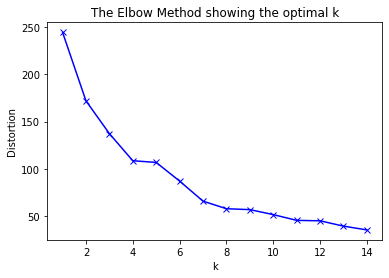

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [18]:
X1=sample

https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

In [19]:
import numpy as np
import pandas as pd

X1.to_numpy()

array([[107., 221.,   2., ...,   0.,   0.,   0.],
       [578., 637.,   1., ...,   0.,   0.,   0.],
       [361., 639.,   1., ...,   0.,   0.,   0.],
       ...,
       [107., 221.,   1., ...,   0.,   0.,   0.],
       [109., 443.,   1., ...,   0.,   0.,   1.],
       [347., 905.,   1., ...,   1.,   0.,   0.]])

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [21]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X1) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame - code below fails as a dataframe - needs to be array
#X_normalized = pd.DataFrame(X_normalized) 

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

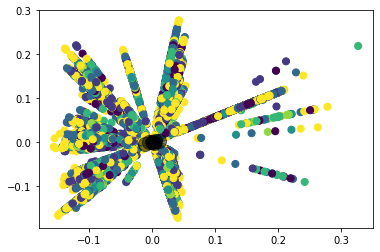

In [21]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

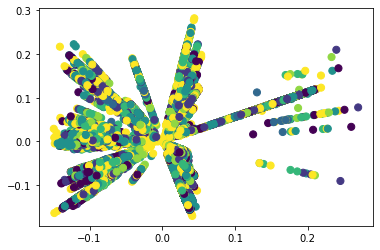

In [34]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X_normalized, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X_normalized.shape[0])[:n_clusters]
    centers = X_normalized[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_normalized, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X_normalized[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X_normalized, 7)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,
            s=50, cmap='viridis');

In [35]:
labels

array([1, 6, 5, ..., 0, 3, 6], dtype=int64)

In [36]:
df = pd.DataFrame(labels, columns = ["Cluster"])
print(df)

       Cluster
0            1
1            6
2            5
3            3
4            3
...        ...
41012        0
41013        3
41014        0
41015        3
41016        6

[41017 rows x 1 columns]


In [37]:
sample_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
914915,838046975,2/13/2014,23:25:00,NaN,NaN,2/14/2014,105,ROBBERY,388.0,"ROBBERY,RESIDENTIAL COMMON AREA",...,1.0,February,13.0,2014.0,NaN,Winter,Late Night,97.0,7.0,10.0
406324,664142616,3/6/2015,11:30:00,3/6/2015,13:20:00,3/6/2015,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",...,0.0,March,6.0,2015.0,Short,Spring,Day,67.0,7.0,7.0
424697,473579039,2/18/2015,0:30:00,2/18/2015,0:35:00,2/18/2015,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,0.0,February,18.0,2015.0,Short,Winter,NaN,57.0,7.0,6.0
360373,821875599,4/11/2015,15:00:00,4/11/2015,16:00:00,4/12/2015,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,1.0,April,11.0,2015.0,Short,Spring,Evening,65.0,5.0,7.0
327782,640503285,5/5/2015,21:30:00,5/6/2015,6:40:00,5/6/2015,109,GRAND LARCENY,457.0,"LARCENY,GRAND OF VEHICULAR/MOTORCYCLE ACCESSORIES",...,1.0,May,5.0,2015.0,Medium,Spring,Night,47.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264708,789272044,6/20/2015,17:35:00,6/20/2015,20:29:00,6/20/2015,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",...,0.0,June,20.0,2015.0,Short,Summer,Evening,45.0,5.0,5.0
875642,602266063,3/16/2014,18:50:00,3/16/2014,18:55:00,3/16/2014,359,OFFENSES AGAINST PUBLIC ADMINI,748.0,"CONTEMPT,CRIMINAL",...,0.0,March,16.0,2014.0,Short,Spring,Night,66.0,6.0,7.0
630108,409726409,9/4/2014,17:00:00,9/7/2014,18:00:00,9/7/2014,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",...,3.0,September,4.0,2014.0,Short,Fall,Evening,48.0,8.0,5.0
917047,950557695,2/11/2014,20:52:00,2/11/2014,21:00:00,2/12/2014,109,GRAND LARCENY,443.0,"LARCENY,GRAND OF BICYCLE",...,1.0,February,11.0,2014.0,Short,Winter,Night,66.0,6.0,7.0


In [38]:
df.head()


,Cluster
0,1
1,6
2,5
3,3
4,3


In [39]:
sample_labeled = df.join(sample_df)

sample_labeled.head()

,Cluster,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,641637920.0,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344.0,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [40]:
#drop Geocell and coordinate data
if 'Latitude' in sample_labeled:    
    del sample_labeled['Latitude'] 
if 'Longitude' in sample_labeled:    
    del sample_labeled['Longitude'] 
if 'Geocell' in sample_labeled:    
    del sample_labeled['Geocell'] 
if 'Geocell_X' in sample_labeled:    
    del sample_labeled['Geocell_X'] 
if 'Geocell_Y' in sample_labeled:    
    del sample_labeled['Geocell_Y'] 
if 'X_COORD_CD' in sample_labeled:
    del sample_labeled['X_COORD_CD']
if 'Y_COORD_CD' in sample_labeled:
    del sample_labeled['Y_COORD_CD']
if 'BORO_NM' in sample_labeled:
    del sample_labeled['BORO_NM']

In [41]:
sample_labeled

,Cluster,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,641637920.0,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344.0,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41012,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41013,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41014,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
sample_labeled.to_csv('sample_labeled2.csv')

In [43]:
#try pairplots next
import seaborn 
import matplotlib.pyplot as plt 

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sabri\Anaconda3\envs\

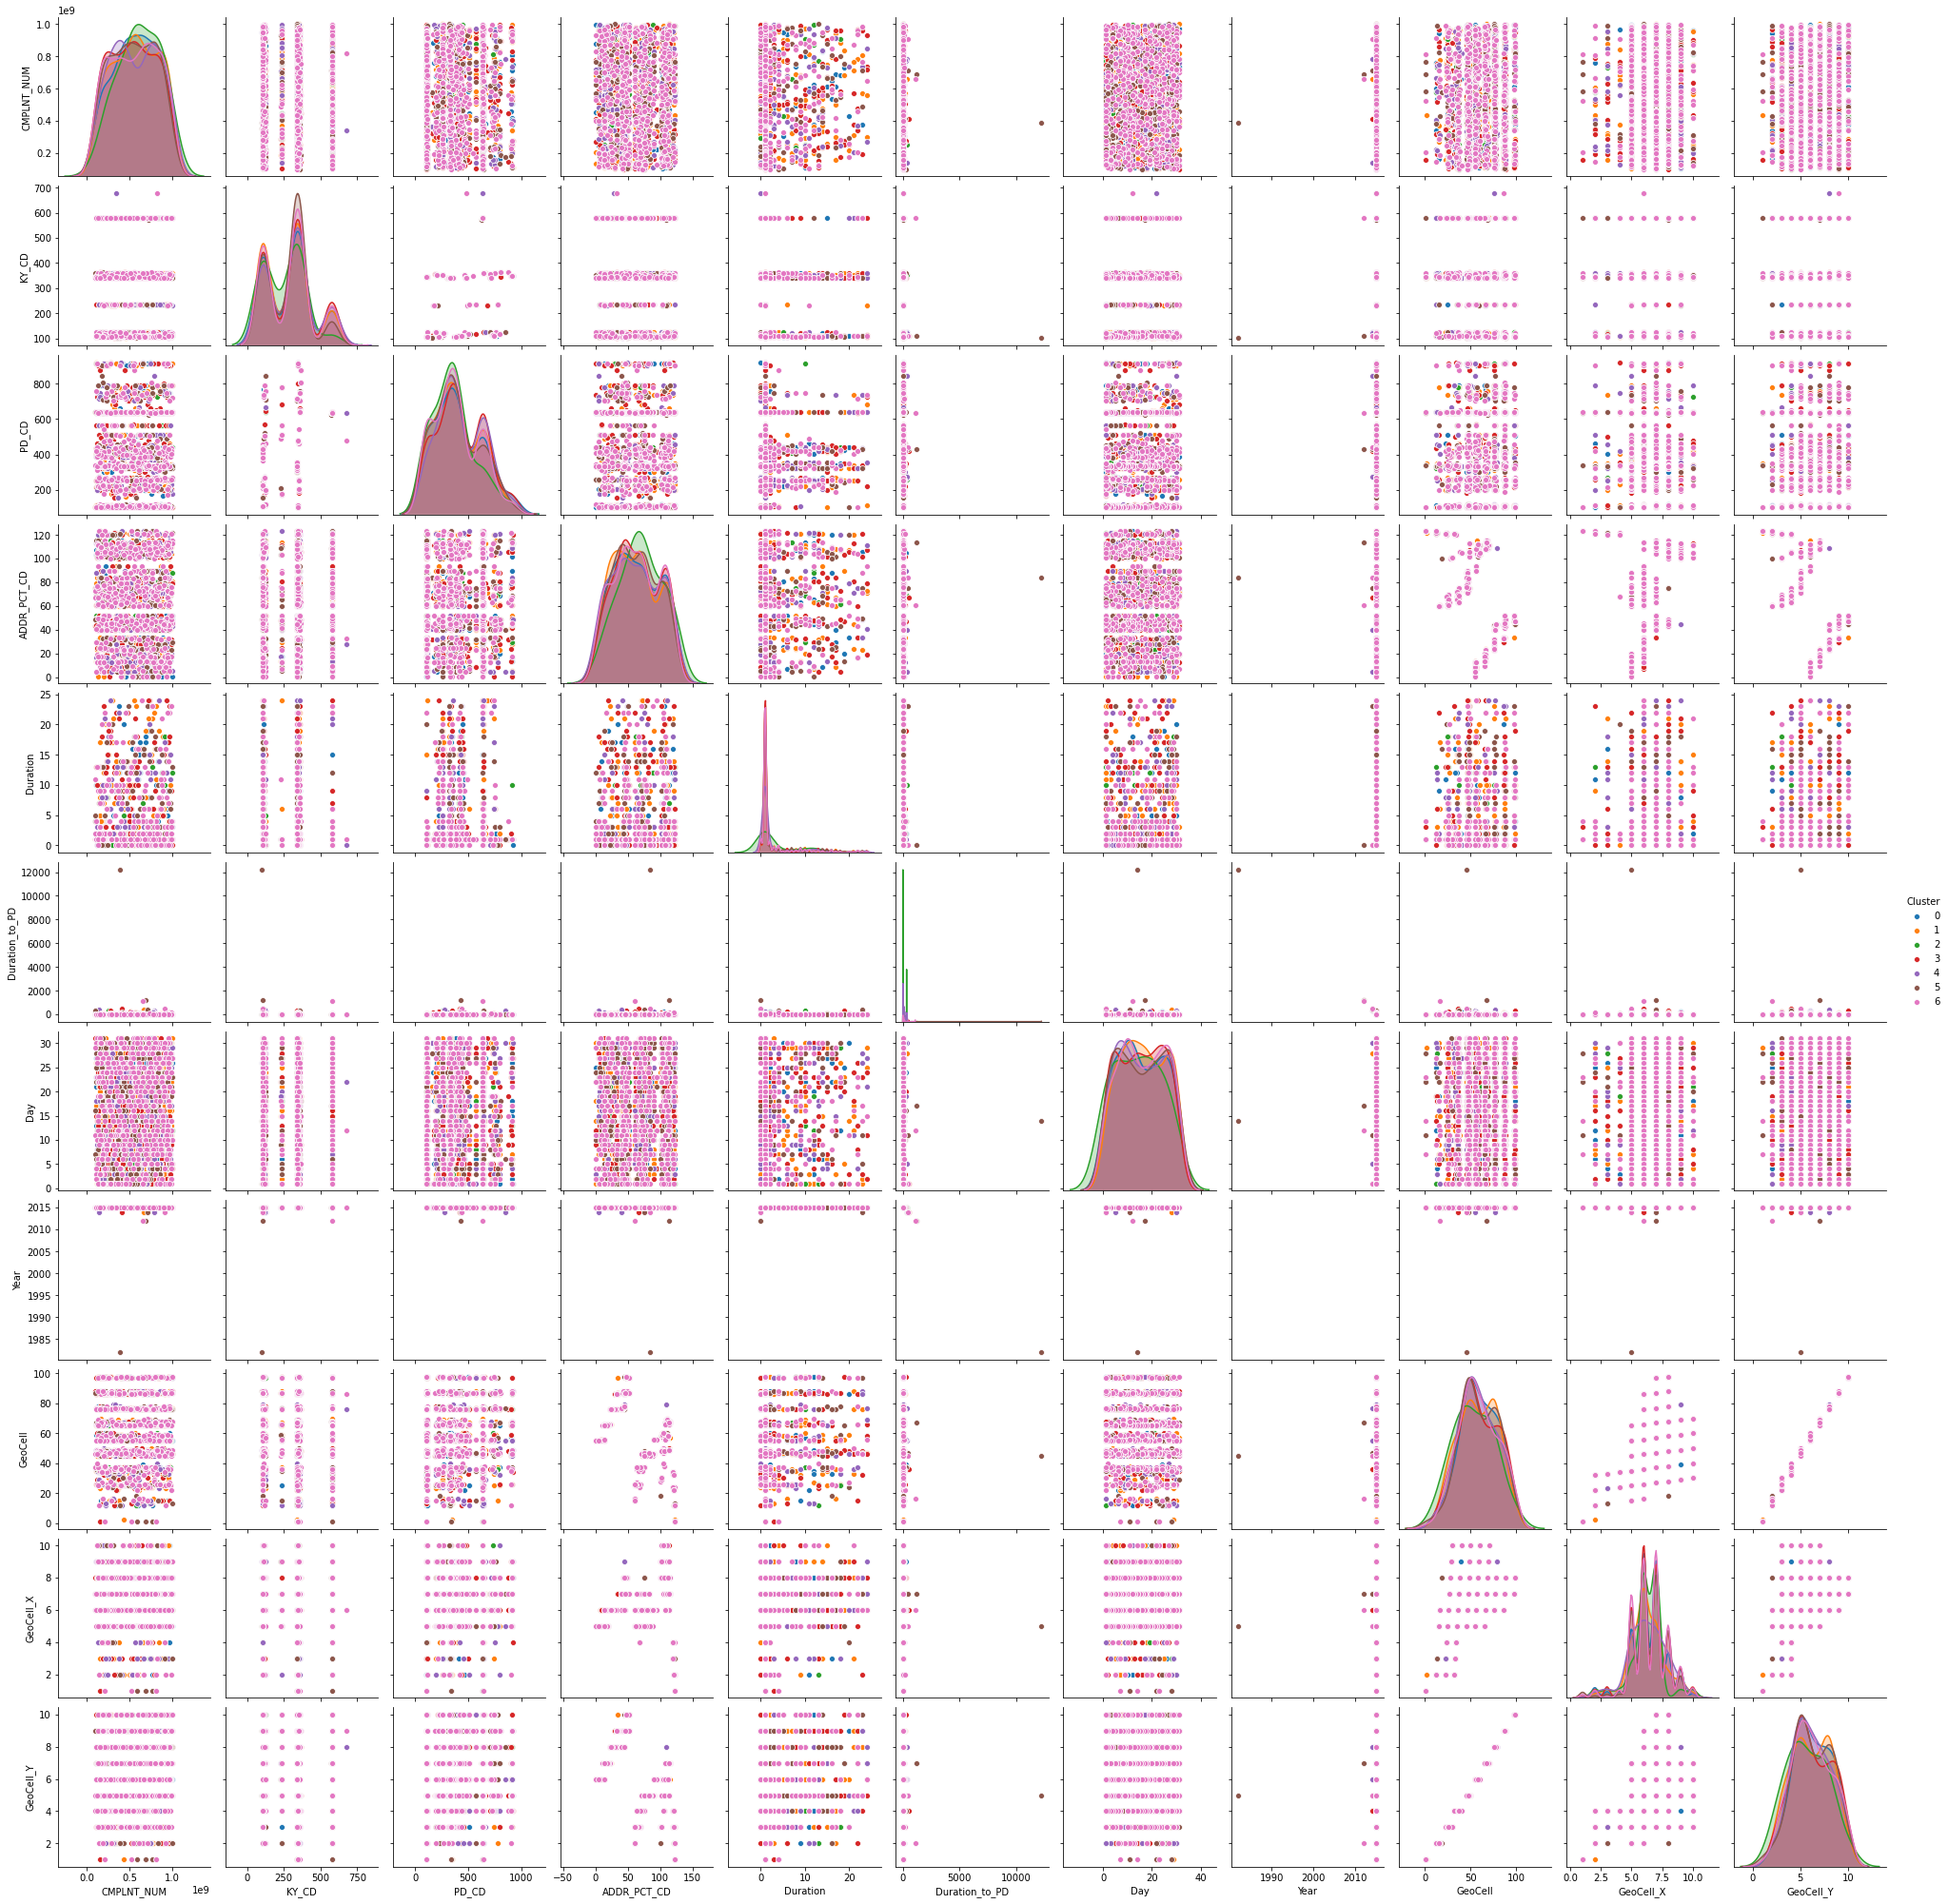

In [44]:
seaborn.pairplot(sample_labeled, hue ='Cluster') 
# to show 
plt.show()